In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('Training_Data_Set.csv')
df

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,NaN,NaN,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4.0,4.0,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4.0,5.0,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4.0,5.0,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4.0,5.0,diesel,3085561.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,skoda,octavia,Delhi,29334.0,Fourth & Above,2014,5,1598,77.0,NaN,4,man,4.0,5.0,diesel,1342996.50
53511,78512,skoda,octavia,Bangalore,223631.0,Fourth & Above,2009,10,1900,77.0,NaN,8,man,5.0,5.0,diesel,510732.75
53512,78513,bmw,x1,Pune,25500.0,Third,2015,4,1995,105.0,NaN,4,auto,4.0,5.0,diesel,2008123.50
53513,78514,toyota,avensis,Jaipur,1195500.0,Third,2011,8,11950,93.0,compact,5,man,NaN,NaN,diesel,874352.25


In [4]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'body_type', 'Vroom Audit Rating', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'Price'],
      dtype='object')

In [5]:
df.shape

(53515, 17)

In [6]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count              7534
seat_count              8511
fuel_type                  0
Price                      0
dtype: int64

In [7]:
df.drop(columns='body_type',inplace=True)

In [8]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)
df['door_count'].fillna(df['door_count'].mode()[0],inplace=True)
df['seat_count'].fillna(df['seat_count'].mean(),inplace=True)

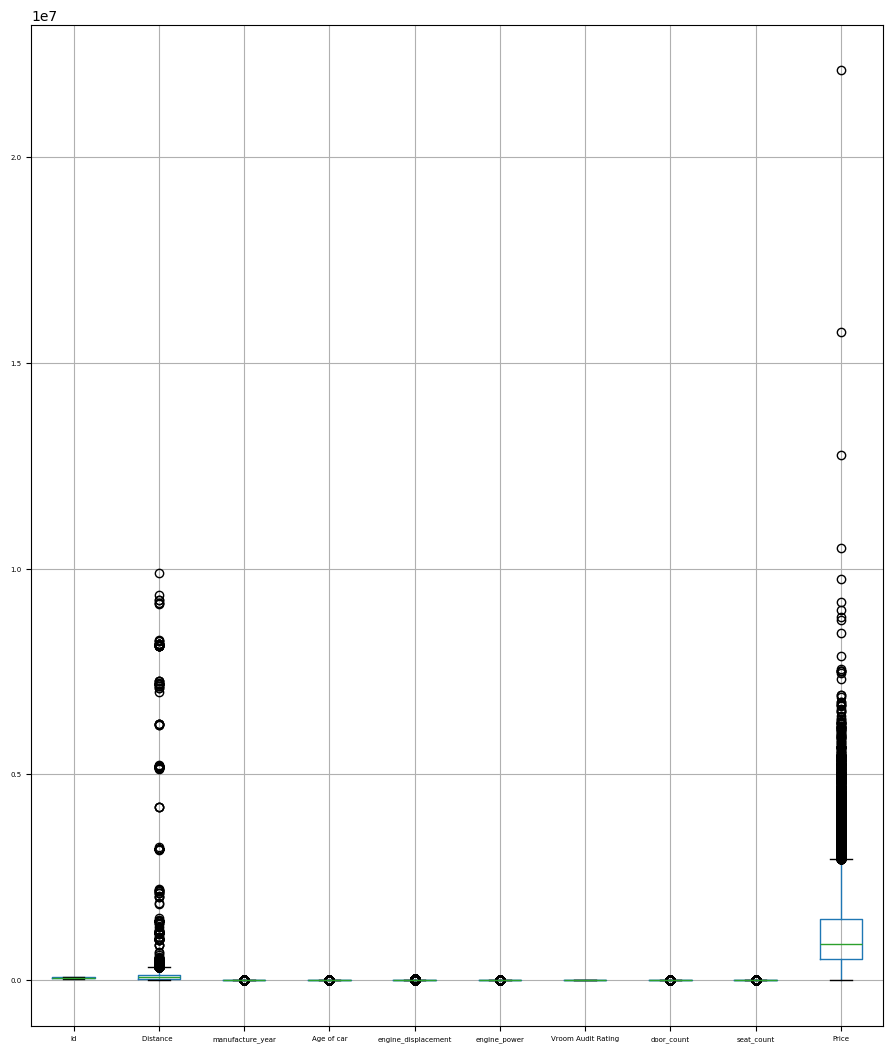

In [9]:
df.boxplot(fontsize=5,figsize=(11,13))
plt.show()

In [10]:
df_cat=df.select_dtypes(include=object)
df_num=df.select_dtypes(exclude=object)

In [11]:
df_num.dtypes

Id                       int64
Distance               float64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
door_count             float64
seat_count             float64
Price                  float64
dtype: object

In [12]:
df_num=df_num.astype(int)

In [13]:
df_cat.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df_cat['Maker']=le.fit_transform(df_cat['Maker'])
df_cat['model']=le.fit_transform(df_cat['model'])
df_cat['Location']=le.fit_transform(df_cat['Location'])
df_cat['Owner Type']=le.fit_transform(df_cat['Owner Type'])
df_cat['transmission']=le.fit_transform(df_cat['transmission'])
df_cat['fuel_type']=le.fit_transform(df_cat['fuel_type'])

In [16]:
df=pd.concat([df_cat,df_num],axis=1)

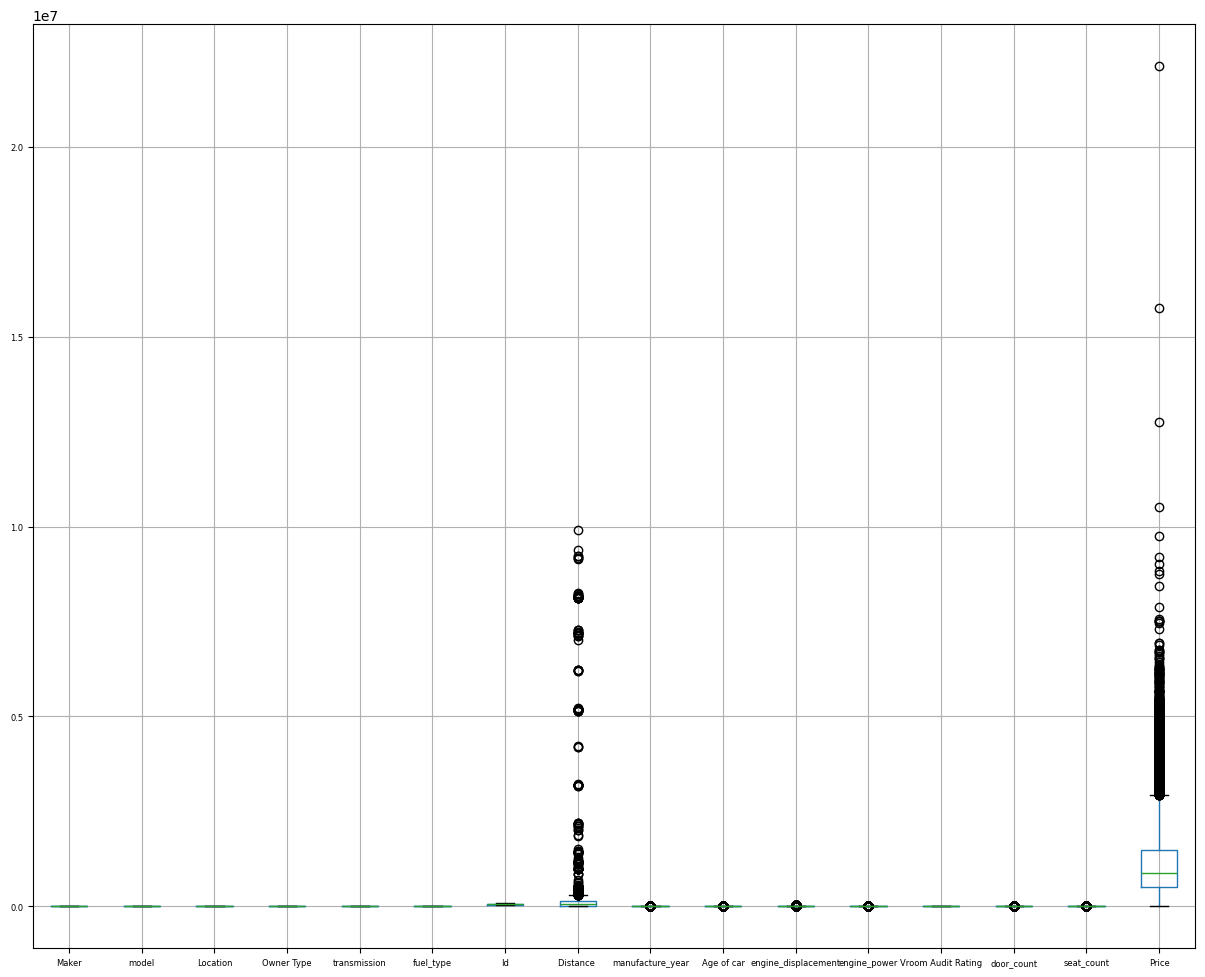

In [17]:
df.boxplot(figsize=(15,12),fontsize=6)
plt.show()

In [18]:
q1=df['Distance '].quantile(0.25)
q3=df['Distance '].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

In [19]:
df_outlier=df[['Distance ']][(df['Distance ']>LL)&(df['Distance ']<Ul)]

In [20]:
df_outlier.isnull().sum()

Distance     0
dtype: int64

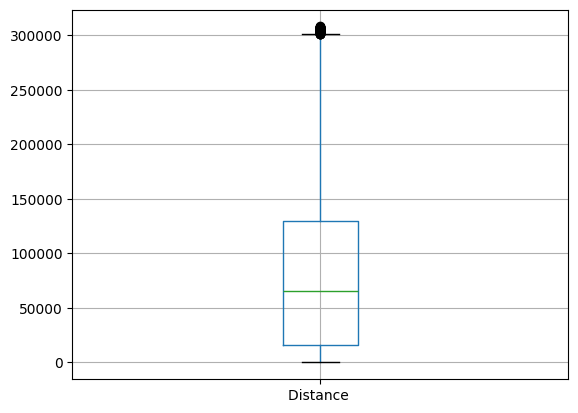

In [21]:
df_outlier.boxplot()
plt.show()

In [22]:
q1=df_outlier.quantile(0.25)
q3=df_outlier.quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier7=df[['Distance ']][(df_outlier>LL)&(df_outlier<Ul)]

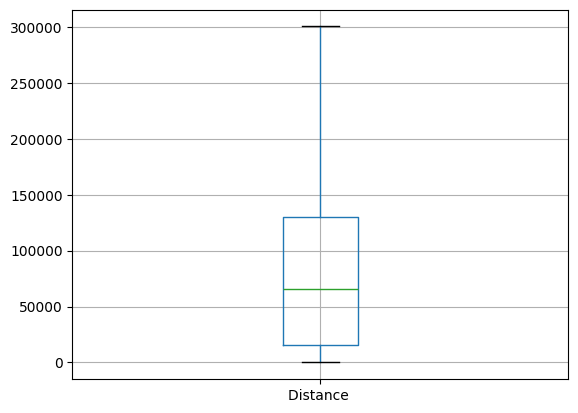

In [23]:
df_outlier7.boxplot()
plt.show()

In [24]:
q1=df['manufacture_year'].quantile(0.25)
q3=df['manufacture_year'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

In [25]:
df_outlier1=df[['manufacture_year']][(df['manufacture_year']>LL)&(df['manufacture_year']<Ul)]

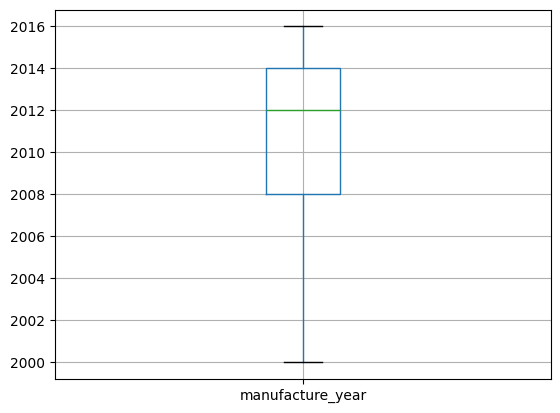

In [26]:
df_outlier1.boxplot()
plt.show()

In [27]:
q1=df['Age of car'].quantile(0.25)
q3=df['Age of car'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

In [28]:
df_outlier2=df[['Age of car']][(df['Age of car']>LL)&(df['Age of car']<Ul)]

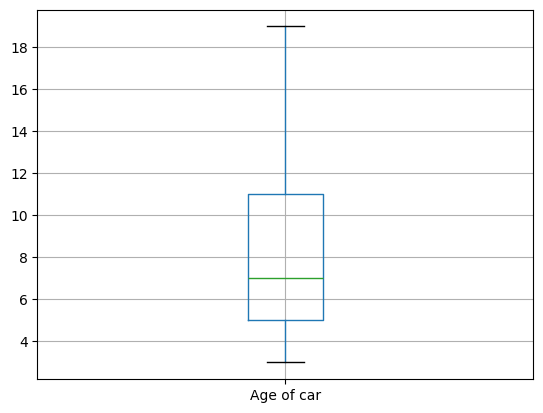

In [29]:
df_outlier2.boxplot()
plt.show()

In [30]:
q1=df['engine_displacement'].quantile(0.25)
q3=df['engine_displacement'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

In [31]:
df_outlier3=df[['engine_displacement']][(df['engine_displacement']>LL)&(df['engine_displacement']<Ul)]

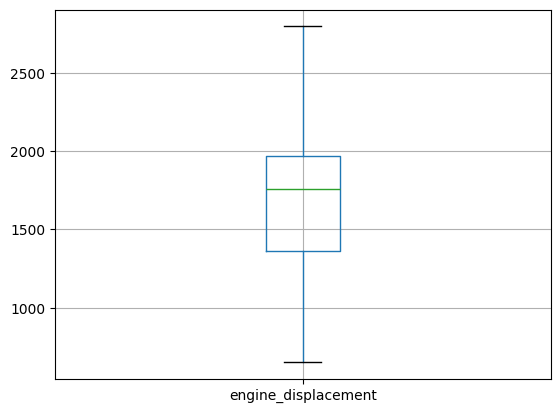

In [32]:
df_outlier3.boxplot()
plt.show()

In [33]:
q1=df['engine_power'].quantile(0.25)
q3=df['engine_power'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

In [34]:
df_outlier4=df[['engine_power']][(df['engine_power']>LL)&(df['engine_power']<Ul)]

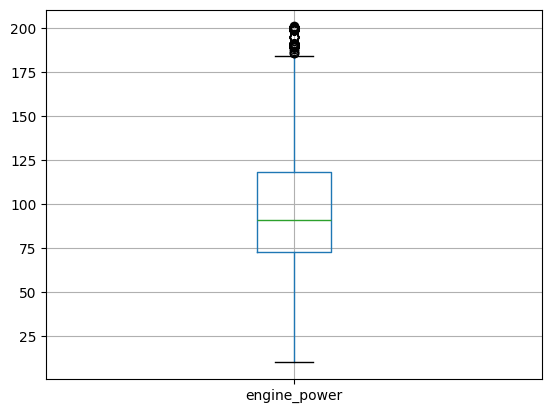

In [35]:
df_outlier4.boxplot()
plt.show()

In [36]:
q1=df_outlier4.quantile(0.25)
q3=df_outlier4.quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier8=df[['engine_power']][(df_outlier4>LL)&(df_outlier4<Ul)]

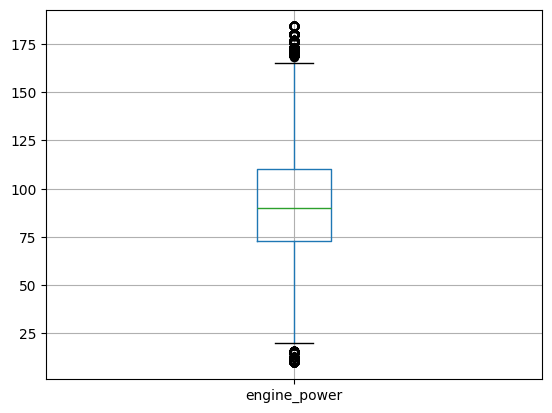

In [37]:
df_outlier8.boxplot()
plt.show()

In [38]:
q1=df_outlier8.quantile(0.25)
q3=df_outlier8.quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_outlier9=df[['engine_power']][(df_outlier8>LL)&(df_outlier8<Ul)]

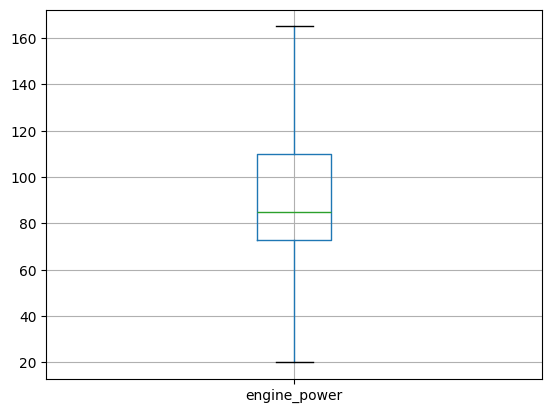

In [39]:
df_outlier9.boxplot()
plt.show()

In [40]:
q1=df['seat_count'].quantile(0.25)
q3=df['seat_count'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

In [41]:
df_outlier5=df[['seat_count']][(df['seat_count']>LL)&(df['seat_count']<Ul)]

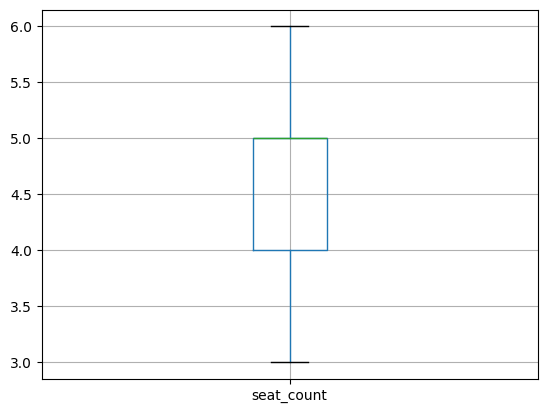

In [42]:
df_outlier5.boxplot()
plt.show()

In [43]:
q1=df['door_count'].quantile(0.25)
q3=df['door_count'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

In [44]:
df_outlier6=df[['door_count']][(df['door_count']>LL)&(df['door_count']<Ul)]

In [45]:
Q1=df[['Price']].quantile(0.25)
Q1
Q3=df[['Price']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price=(df[['Price']][(df[['Price']]>LL)&(df[['Price']]<UL)])

In [46]:
Q1=df2_Price.quantile(0.25)
Q1
Q3=df2_Price.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price1=(df[['Price']][(df2_Price>LL)&(df2_Price<UL)])

In [47]:
Q1=df2_Price1.quantile(0.25)
Q1
Q3=df2_Price1.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price2=(df[['Price']][(df2_Price1>LL)&(df2_Price1<UL)])

In [48]:
Q1=df2_Price2.quantile(0.25)
Q1
Q3=df2_Price2.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price3=(df[['Price']][(df2_Price2>LL)&(df2_Price2<UL)])

In [49]:
Q1=df2_Price3.quantile(0.25)
Q1
Q3=df2_Price3.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price4=(df[['Price']][(df2_Price3>LL)&(df2_Price3<UL)])

In [50]:
Q1=df2_Price4.quantile(0.25)
Q1
Q3=df2_Price4.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price5=(df[['Price']][(df2_Price4>LL)&(df2_Price4<UL)])

In [51]:
Q1=df2_Price5.quantile(0.25)
Q1
Q3=df2_Price5.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price6=(df[['Price']][(df2_Price5>LL)&(df2_Price5<UL)])

In [52]:
Q1=df2_Price6.quantile(0.25)
Q1
Q3=df2_Price6.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price7=(df[['Price']][(df2_Price6>LL)&(df2_Price6<UL)])

In [53]:
Q1=df2_Price7.quantile(0.25)
Q1
Q3=df2_Price7.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price8=(df[['Price']][(df2_Price7>LL)&(df2_Price7<UL)])

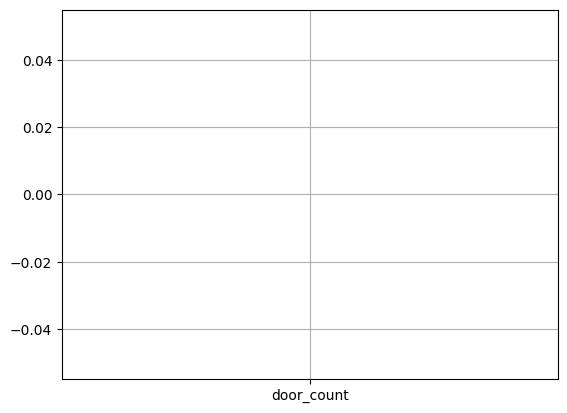

In [54]:
df_outlier6.boxplot()
plt.show()

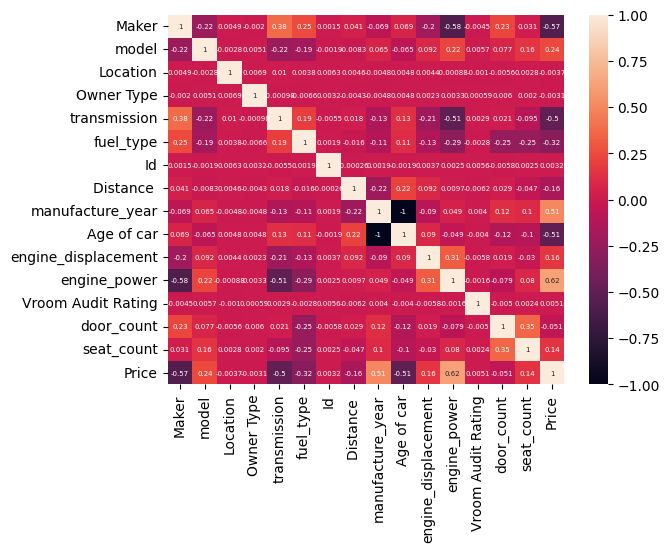

In [55]:
sns.heatmap(df.corr(),annot=True,annot_kws={'fontsize':5})
plt.show()

In [56]:
df_price=df[['Price']]

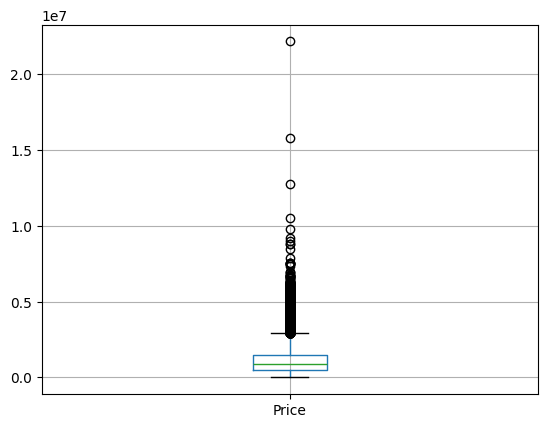

In [57]:
df_price.boxplot()
plt.show()

In [58]:
df_num=pd.concat([df_cat,df_outlier7,df_outlier1,df_outlier2,df_outlier3,df_outlier9,df_outlier5,df_price,df2_Price8,df[['door_count']],df[['Id']],df[['Vroom Audit Rating']]],axis=1)

In [59]:
df_num

,Maker,model,Location,Owner Type,transmission,fuel_type,Distance,manufacture_year,Age of car,engine_displacement,engine_power,seat_count,Price,Price,door_count,Id,Vroom Audit Rating
0,6,8,0,2,1,1,65520.0,NaN,NaN,1964.0,147.0,4.0,543764,543764.0,4,25001,8
1,2,9,0,3,1,1,27750.0,2012.0,7.0,1242.0,51.0,4.0,401819,401819.0,4,25002,6
2,1,18,5,3,0,0,46000.0,2014.0,5.0,1995.0,105.0,5.0,2392855,2392855.0,4,25003,7
3,5,6,9,3,1,1,43949.0,2011.0,8.0,1618.0,140.0,5.0,958606,958606.0,4,25004,7
4,1,20,6,1,0,0,59524.0,2012.0,7.0,NaN,NaN,5.0,3085561,NaN,4,25005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,6,8,4,1,1,0,29334.0,2014.0,5.0,1598.0,77.0,5.0,1342996,1342996.0,4,78511,4
53511,6,8,1,1,1,0,223631.0,2009.0,10.0,1900.0,77.0,5.0,510732,510732.0,5,78512,8
53512,1,18,10,3,0,0,25500.0,2015.0,4.0,1995.0,105.0,5.0,2008123,2008123.0,4,78513,4
53513,7,1,6,3,1,0,NaN,2011.0,8.0,NaN,93.0,4.0,874352,874352.0,4,78514,5


In [60]:
df_num.isnull().sum()

Maker                     0
model                     0
Location                  0
Owner Type                0
transmission              0
fuel_type                 0
Distance                660
manufacture_year       1325
Age of car             1325
engine_displacement    5651
engine_power           5223
seat_count             1581
Price                     0
Price                  2961
door_count                0
Id                        0
Vroom Audit Rating        0
dtype: int64

In [61]:
df_num.dtypes

Maker                    int64
model                    int64
Location                 int64
Owner Type               int64
transmission             int64
fuel_type                int64
Distance               float64
manufacture_year       float64
Age of car             float64
engine_displacement    float64
engine_power           float64
seat_count             float64
Price                    int64
Price                  float64
door_count               int64
Id                       int64
Vroom Audit Rating       int64
dtype: object

In [62]:
df_num.dropna(subset=['Distance ','manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power','Price','seat_count'],inplace=True)

In [63]:
df_num.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
seat_count             0
Price                  0
Price                  0
door_count             0
Id                     0
Vroom Audit Rating     0
dtype: int64

In [64]:
df_num=df_num.astype(int)

In [65]:
df3_Price=df_num[['Price']]

In [66]:
df_num.drop(columns='Price',inplace=True)

In [67]:
df.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count', 'Price'],
      dtype='object')

In [68]:
df1=pd.concat([df_num,df3_Price],axis=1)

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_stand=pd.DataFrame(ss.fit_transform(df1),columns=df1.columns)

In [70]:
df_stand.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
seat_count             0
door_count             0
Id                     0
Vroom Audit Rating     0
Price                  0
Price                  0
dtype: int64

In [71]:
df.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
Price                  0
dtype: int64

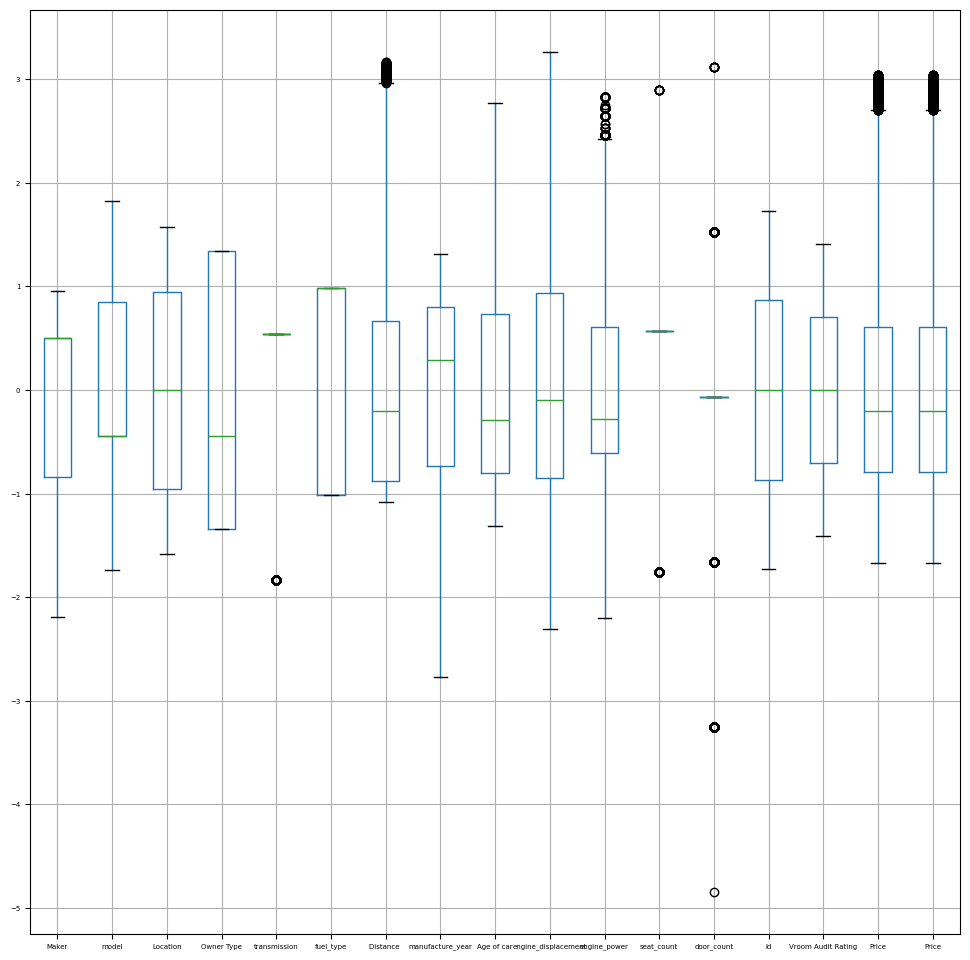

In [82]:
df_stand.boxplot(fontsize=5,figsize=(12,12))
plt.show()

In [73]:
X=df_stand[['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type','Id', 'Distance ', 'manufacture_year', 'Age of car','engine_displacement', 'engine_power', 'Vroom Audit Rating','door_count', 'seat_count']]
y=df_stand['Price']

In [74]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [75]:
model.fit(X,y)

LinearRegression()

In [76]:
y_predicted=pd.DataFrame(model.predict(X))

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predicted)

np.float64(0.17194233888407146)

In [78]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_predicted)

np.float64(0.3188962218391536)

In [79]:
model.score(X,y)

0.8280576611159286